In [4]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('gdrive/My Drive/Cocacola/KO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,15.160874,16355800
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000


In the data set above:

Date: This is the day NYSE is opened

Open: The open price during the trading day

High: The highest price during the trading hours

Low: The Lowest price during the trading hours

Close: The Closing price at the end of the market day

Adj Close: Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions

Volume: The volume of shares sold during the trading hours.


---



This dataset shows the amount that Cocacola traded in the NYSE

We can find patterns from here

In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2767 non-null   object 
 1   Open       2767 non-null   float64
 2   High       2767 non-null   float64
 3   Low        2767 non-null   float64
 4   Close      2767 non-null   float64
 5   Adj Close  2767 non-null   float64
 6   Volume     2767 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.4+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,38.971084,39.213791,38.731924,38.983206,31.133622,1.550800e+07
std,7.673458,7.700123,7.649498,7.674432,8.785123,7.245526e+06
min,19.075001,19.605000,18.719999,18.924999,12.501944,2.996300e+06
25%,33.927499,34.127499,33.680000,33.924999,24.391891,1.088410e+07
50%,40.650002,40.880001,40.419998,40.650002,31.702501,1.381200e+07
75%,43.985001,44.259998,43.750000,43.990002,37.336870,1.819545e+07
max,55.750000,55.919998,55.299999,55.770000,51.488750,1.241690e+08


In [10]:
from datetime import datetime

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year


In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,15.160874,16355800,1,2009
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200,1,2009
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800,1,2009
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000,1,2009
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000,1,2009
...,...,...,...,...,...,...,...,...,...
2762,2019-12-23,55.000000,55.240002,54.840000,54.910000,51.079445,9300800,12,2019
2763,2019-12-24,54.799999,55.000000,54.639999,54.709999,50.893394,3359300,12,2019
2764,2019-12-26,54.919998,55.020000,54.790001,55.020000,51.181774,6228500,12,2019
2765,2019-12-27,55.009998,55.450001,55.000000,55.349998,51.488750,6895500,12,2019


In [12]:
# EDA

In [13]:
# Yearly Analysis

px.line(df, x='Year', y='Adj Close', title='Adjusted Close Price per Year')

By the Year there was an Increase in the Asjusted Close Price for cocacola, there are cases that the Adjusted Close didn't continue from were the previous year stopped but sill went ahead and performed better in the stock market.

In [14]:
# Checking the Volume of Shares Sold per Year

px.line(df, x='Year', y='Volume', title='Volume Shares traded by the Year')

year 2009 had the most traded Volume of Shares and dropped more than 50% in the 
following year 2010, and 2011.

year 2012 there was 48% jump in the volume of shares sold. Although a more than 50% drop in the volume in 2013.

CocaCola reduced the Number of  Shares it sold from year 2013 with a slight increase in year 2019.

In [15]:
px.histogram(df, x = 'Year', y = 
             'Volume', color=
             'Month', title='Volume per Year')

In The total volume sold, CocaCola reduced the volume of shares from 2009 to 2019.

In [16]:
# We want to investigate the Close price without deductions

px.line(df, x='Date', y='Close', title='Close Price Daily')

In [17]:
# checking the best performing Months per year.

y2009 = pd.DataFrame(df[df['Year']==2009])
y2009

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,15.160874,16355800,1,2009
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200,1,2009
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800,1,2009
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000,1,2009
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000,1,2009
...,...,...,...,...,...,...,...,...,...
247,2009-12-24,28.745001,28.754999,28.525000,28.719999,19.633631,5814200,12,2009
248,2009-12-28,28.705000,28.790001,28.639999,28.719999,19.633631,7679600,12,2009
249,2009-12-29,28.725000,28.985001,28.725000,28.870001,19.736172,9551000,12,2009
250,2009-12-30,28.870001,28.950001,28.740000,28.840000,19.715664,9625200,12,2009


In [18]:
# Performance of prices per month based on Close.

px.line(y2009, x='Month', y='Close', title='Closing Price per Month')

In [19]:
px.line(y2009, x='Date', y='Close', title='Closing Price per Month')

The best selling Month is in **December**, the worst Month is in **March**

December Events are Due to being Festive Periods.
As this assumption is made that wis when CocaCola is more traded.

In [20]:
# Check which month traded with High Price, for investors to Cash In.

px.line(y2009, x='Date', y='High', title='High Price in the year 2009')

Profitable Month is December

In [21]:
# Check which month traded with Low Price, for investors to Cash In.

px.line(y2009, x='Date', y='Low', title='Low Prices Traded in the year 2009')

In [22]:
y2011 = pd.DataFrame(df[df['Year']==2011])

In [23]:
px.line(y2011, x='Month', y='Close', title='Closing Price per Month')

The Poorly performing Month is March.

The best performing Month is September.

In [24]:
px.line(y2011, x='Date', y='Close', title='Closing Price per Month')

In [25]:
y2012 = pd.DataFrame(df[df['Year']==2012])
y2013 = pd.DataFrame(df[df['Year']==2013])
y2014 = pd.DataFrame(df[df['Year']==2014])
y2015 = pd.DataFrame(df[df['Year']==2015])
y2016 = pd.DataFrame(df[df['Year']==2016])
y2017 = pd.DataFrame(df[df['Year']==2017])
y2018 = pd.DataFrame(df[df['Year']==2018])
y2019 = pd.DataFrame(df[df['Year']==2019])

In [26]:
px.line(y2012, x='Month', y='Close', title='Closing Price per Month')

The Pattern for March been the poor performing changed, and becomes January.

The best performing month is the month of August. 

There was a decline from Sep 21st downard till December.

In [27]:
px.line(y2012, x='Date', y='Close', title='Closing Price per Month')

In [28]:
px.line(y2013, x='Date', y='Close', title='Closing Price per Month')

In [29]:
px.line(y2014, x='Date', y='Close', title='Closing Price per Month')

In [30]:
px.line(y2015, x='Date', y='Close', title='Closing Price per Month')

In [31]:
px.line(y2016, x='Date', y='Close', title='Closing Price per Month')

In [32]:
px.line(y2017, x='Date', y='Close', title='Closing Price per Month')

In [33]:
px.line(y2018, x='Date', y='Close', title='Closing Price per Month')

In [34]:
px.line(y2019, x='Date', y='Close', title='Closing Price per Month')

In [35]:
import plotly.graph_objects as go
import pandas as pd



fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                      ])

fig.update_layout(
    title='Candle Stick Chart',
    yaxis_title='KO Stock'
)

fig.show()

In [36]:
# Daily percentage Change

In [37]:
df['Perc_Change'] = df['Adj Close'].pct_change()*100

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Perc_Change
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,15.160874,16355800,1,2009,NaN
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200,1,2009,-1.002159
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800,1,2009,-1.606549
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000,1,2009,0.492077
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000,1,2009,0.689944
...,...,...,...,...,...,...,...,...,...,...
2762,2019-12-23,55.000000,55.240002,54.840000,54.910000,51.079445,9300800,12,2019,-0.109156
2763,2019-12-24,54.799999,55.000000,54.639999,54.709999,50.893394,3359300,12,2019,-0.364238
2764,2019-12-26,54.919998,55.020000,54.790001,55.020000,51.181774,6228500,12,2019,0.566635
2765,2019-12-27,55.009998,55.450001,55.000000,55.349998,51.488750,6895500,12,2019,0.599776


In [39]:
# Drop NAN

df.dropna(inplace=True, axis=0)

In [42]:
# Plot Daily Percentage Change

px.line(df, x='Date', y='Perc_Change', title='Daily Percentage')

In [45]:
# Distribution

px.histogram(df, x='Perc_Change', marginal='box', title='Perc_Change Distribution')

In [46]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Perc_Change'].count())
df['Trend']= df['Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Perc_Change,Trend
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200,1,2009,-1.002159,Negative
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800,1,2009,-1.606549,Negative
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000,1,2009,0.492077,Slight or No change
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000,1,2009,0.689944,Slight Positive
5,2009-01-09,22.615000,22.629999,22.125000,22.299999,14.731483,19802400,1,2009,-1.414648,Negative


In [54]:
df_pie_data = df.groupby('Trend')
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
# plt.pie(df_pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)

# plt.show()

px.pie(df_pie_data, values=df_pie_data['Trend'].count(), names=pie_label)

In [55]:
# Volatility Anlaysisi

In [60]:
df_vol = df['Perc_Change'].rolling(7).std()*np.sqrt(7)
px.line(y=df_vol, x=df['Date'])

From the Volatility analysis it shows how highly volaitle trading Coca Cola was, they have managed to reduce the Volailty this would be noticed in perc_change in profit per year. 

In [61]:
# MOVING AVERAGE 

# ema 

# The exponential moving average 

The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

In [63]:
df['EMA_0.1'] = df['Adj Close'].ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
df['EMA_0.3'] = df['Adj Close'].ewm(alpha=0.3, adjust=False).mean()

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Perc_Change,Trend,EMA_0.1,EMA_0.3
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,15.008938,20237200,1,2009,-1.002159,Negative,15.008938,15.008938
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.767812,21307800,1,2009,-1.606549,Negative,14.984825,14.936600
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.840481,21581000,1,2009,0.492077,Slight or No change,14.970391,14.907764
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.942872,20087000,1,2009,0.689944,Slight Positive,14.967639,14.918297
5,2009-01-09,22.615000,22.629999,22.125000,22.299999,14.731483,19802400,1,2009,-1.414648,Negative,14.944023,14.862253


Text(0, 0.5, 'Perc_Change')

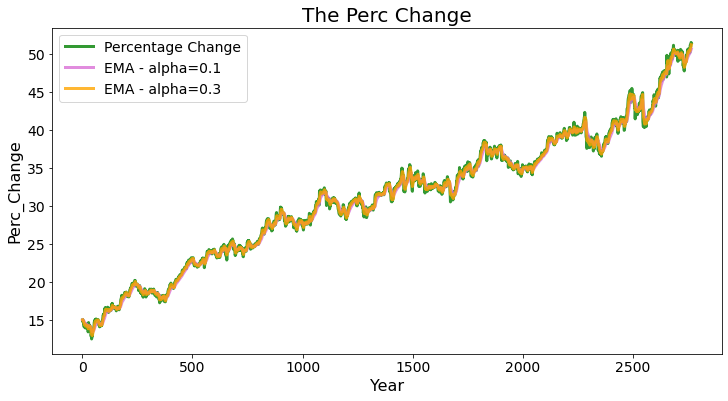

In [66]:

# colors for the line plot
colors = ['green', 'orchid', 'orange']

# line plot - the yearly average air temperature in Barcelona
df[['Adj Close', 'EMA_0.1', 'EMA_0.3']].plot(
    color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Percentage Change', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The Perc Change', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Perc_Change', fontsize=16)

In [74]:
df['Adj_mean'] = df['Adj Close'].mean()


In [78]:
import plotly.graph_objects as go


# Create traces

fig = go.Figure(data=[go.Candlestick(x=df.Date,
                                     open=df.Open, 
                                     high=df.High,
                                     low=df.Low,
                                     close=df.Close), 
                      go.Scatter(x=df.Date, y=df['EMA_0.1'],
                                 line=dict(color='orange', width=1)),
                      go.Scatter(x=df.Date, y=df['EMA_0.3'],
                                 line=dict(color='green', width=1))])
fig.show()

In [79]:
df['MA5'] = df.Close.rolling(5).mean()
df['MA20'] = df.Close.rolling(20).mean()

In [82]:
fig = go.Figure(data=[go.Candlestick(x=df.Date,
                                     open=df.Open, 
                                     high=df.High,
                                     low=df.Low,
                                     close=df.Close), 
                      go.Scatter(x=df.Date, y=df['MA5'],
                                 line=dict(color='orange', width=1), name='MA5'),
                      go.Scatter(x=df.Date, y=df['MA20'],
                                 line=dict(color='blue', width=1), name='MA20')])
# remove rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)
# add chart title 
fig.update_layout(title="KO")
fig.show()

In [87]:
# VOLUME and MACD

In [86]:
from ta.trend import MACD
from ta.momentum import StochasticOscillator
# MACD
macd = MACD(close=df['Close'], 
            window_slow=26,
            window_fast=12, 
            window_sign=9)
# stochastic
stoch = StochasticOscillator(high=df['High'],
                             close=df['Close'],
                             low=df['Low'],
                             window=14, 
                             smooth_window=3)

In [90]:
# build complete timeline from start date to end date
dt_all = pd.date_range(start=df.index[0],end=df.index[-1])
# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(df.index)]
# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [91]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1, shared_xaxes=True)
# Plot OHLC on 1st subplot (using the codes from before)
# Plot volume trace on 2nd row 
fig.add_trace(go.Bar(x=df.index, 
                     y=df['Volume']
                    ), row=2, col=1)
# Plot MACD trace on 3rd row
fig.add_trace(go.Bar(x=df.index, 
                     y=macd.macd_diff()
                    ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd(),
                         line=dict(color='black', width=2)
                        ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd_signal(),
                         line=dict(color='blue', width=1)
                        ), row=3, col=1)
# Plot stochastics trace on 4th row
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch(),
                         line=dict(color='black', width=2)
                        ), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch_signal(),
                         line=dict(color='blue', width=1)
                        ), row=4, col=1)
# update layout by changing the plot size, hiding legends & rangeslider, and removing gaps between dates
fig.update_layout(height=900, width=1200, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[dict(values=dt_breaks)])

In [92]:
# add subplot properties when initiliazing fig variable
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    vertical_spacing=0.01, 
                    row_heights=[0.5,0.1,0.2,0.2])
# Plot OHLC on 1st subplot (using the codes from before)
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'], 
                             showlegend=False))
# add moving average traces
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA5'], 
                         line=dict(color='blue', width=2), 
                         name='MA 5'))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['MA20'], 
                         line=dict(color='orange', width=2), 
                         name='MA 20'))

# Plot volume trace on 2nd row 
colors = ['green' if row['Open'] - row['Close'] >= 0 
          else 'red' for index, row in df.iterrows()]
fig.add_trace(go.Bar(x=df.index, 
                     y=df['Volume'],
                     marker_color=colors
                    ), row=2, col=1)

# Plot MACD trace on 3rd row
colors = ['green' if val >= 0 
          else 'red' for val in macd.macd_diff()]
fig.add_trace(go.Bar(x=df.index, 
                     y=macd.macd_diff(),
                     marker_color=colors
                    ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd(),
                         line=dict(color='black', width=2)
                        ), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=macd.macd_signal(),
                         line=dict(color='blue', width=1)
                        ), row=3, col=1)

# Plot stochastics trace on 4th row 
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch(),
                         line=dict(color='black', width=2)
                        ), row=4, col=1)
fig.add_trace(go.Scatter(x=df.index,
                         y=stoch.stoch_signal(),
                         line=dict(color='blue', width=1)
                        ), row=4, col=1)

# update layout by changing the plot size, hiding legends & rangeslider, and removing gaps between dates
fig.update_layout(height=900, width=1200, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,
                  xaxis_rangebreaks=[dict(values=dt_breaks)])

# update y-axis label
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_yaxes(title_text="MACD", showgrid=False, row=3, col=1)
fig.update_yaxes(title_text="Stoch", row=4, col=1)

fig.show()
# removing white spaces
fig.update_layout(margin=go.layout.Margin(
        l=20, #left margin
        r=20, #right margin
        b=20, #bottom margin
        t=20  #top margin
    ))

fig.show()

This is a prove of the Trend Analysis of Cocacola which is profitable for Investors, and other competitors can learn how they achieve this close relating to their Financial Models.